In [1]:
pip install streamlit

     |████████████████████████████████| 9.7 MB 19.7 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 93.2 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 4.3 MB 93.5 MB/s eta 0:00:01
     |████████████████████████████████| 164 kB 108.6 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 101.0 MB/s eta 0:00:01
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
     |████████████████████████████████| 74 kB 2.4 MB/s s eta 0:00:01
     |████████████████████████████████| 339 kB 48.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
# tomtom csv https://raw.githubusercontent.com/ActiveConclusion/COVID19_mobility/master/tomtom_reports/tomtom_trafic_index.csv

df_tomtom = pd.read_csv("https://raw.githubusercontent.com/ActiveConclusion/COVID19_mobility/master/tomtom_reports/tomtom_trafic_index.csv")
df_tomtom

,country,city,date,congestion,diffRatio
0,Argentina,Buenos Aires,2019-12-30,27,0.000000
1,Argentina,Buenos Aires,2019-12-31,10,-0.655172
2,Argentina,Buenos Aires,2020-01-01,6,-0.806452
3,Argentina,Buenos Aires,2020-01-02,18,-0.454545
4,Argentina,Buenos Aires,2020-01-03,21,-0.400000
...,...,...,...,...,...
316427,United States of America,Worcester,2022-02-17,16,-0.111111
316428,United States of America,Worcester,2022-02-18,19,-0.095238
316429,United States of America,Worcester,2022-02-19,12,0.090909
316430,United States of America,Worcester,2022-02-20,6,-0.400000


In [3]:
df_tomtom_india = df_tomtom[df_tomtom['country']=="India"]
# https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
df_tomtom_india['date'] = pd.to_datetime(df_tomtom_india['date'])

/tmp/ipykernel_788/1855189212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomtom_india['date'] = pd.to_datetime(df_tomtom_india['date'])


In [4]:
"""Check the cities available"""
list(df_tomtom_india.city.unique()) + ['Average']

['Bengaluru', 'Mumbai', 'New Delhi', 'Pune', 'Average']

In [5]:
df_tomtom_india_bengaluru = df_tomtom[df_tomtom['city']=="Bengaluru"]
df_tomtom_india_mumbai = df_tomtom[df_tomtom['city']=="Mumbai"]
df_tomtom_india_newdelhi = df_tomtom[df_tomtom['city']=="New Delhi"]
df_tomtom_india_pune = df_tomtom[df_tomtom['city']=="Pune"]
df_tomtom_india_average = df_tomtom_india.groupby("date").mean()

In [6]:
# https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/
df_tomtom_india_bengaluru["congestion_ma"] = df_tomtom_india_bengaluru['congestion'].rolling(7,center=False).mean() 
df_tomtom_india_bengaluru["diffRatio_ma"] = df_tomtom_india_bengaluru['diffRatio'].rolling(7,center=False).mean() 
df_tomtom_india_bengaluru.tail(20)

/tmp/ipykernel_788/2278238497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomtom_india_bengaluru["congestion_ma"] = df_tomtom_india_bengaluru['congestion'].rolling(7,center=False).mean()
/tmp/ipykernel_788/2278238497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomtom_india_bengaluru["diffRatio_ma"] = df_tomtom_india_bengaluru['diffRatio'].rolling(7,center=False).mean()


,country,city,date,congestion,diffRatio,congestion_ma,diffRatio_ma
101199,India,Bengaluru,2022-02-02,27,-0.509091,24.714286,-0.475565
101200,India,Bengaluru,2022-02-03,28,-0.481481,25.142857,-0.467629
101201,India,Bengaluru,2022-02-04,28,-0.471698,25.571429,-0.459543
101202,India,Bengaluru,2022-02-05,34,-0.244444,26.428571,-0.440495
101203,India,Bengaluru,2022-02-06,20,-0.285714,26.714286,-0.430291
101204,India,Bengaluru,2022-02-07,27,-0.470588,27.000000,-0.424689
101205,India,Bengaluru,2022-02-08,27,-0.470588,27.285714,-0.419087
101206,India,Bengaluru,2022-02-09,28,-0.490909,27.428571,-0.416489
101207,India,Bengaluru,2022-02-10,30,-0.444444,27.714286,-0.411198
101208,India,Bengaluru,2022-02-11,29,-0.452830,27.857143,-0.408503


In [7]:
df_tomtom_india_mumbai["congestion_ma"] = df_tomtom_india_mumbai['congestion'].rolling(7,center=False).mean() 
df_tomtom_india_mumbai["diffRatio_ma"] = df_tomtom_india_mumbai['diffRatio'].rolling(7,center=False).mean() 

df_tomtom_india_newdelhi["congestion_ma"] = df_tomtom_india_newdelhi['congestion'].rolling(7,center=False).mean() 
df_tomtom_india_newdelhi["diffRatio_ma"] = df_tomtom_india_newdelhi['diffRatio'].rolling(7,center=False).mean() 

df_tomtom_india_pune["congestion_ma"] = df_tomtom_india_pune['congestion'].rolling(7,center=False).mean() 
df_tomtom_india_pune["diffRatio_ma"] = df_tomtom_india_pune['diffRatio'].rolling(7,center=False).mean() 

df_tomtom_india_average["congestion_ma"] = df_tomtom_india_average['congestion'].rolling(7,center=False).mean() 
df_tomtom_india_average["diffRatio_ma"] = df_tomtom_india_average['diffRatio'].rolling(7,center=False).mean() 

/tmp/ipykernel_788/177934052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomtom_india_mumbai["congestion_ma"] = df_tomtom_india_mumbai['congestion'].rolling(7,center=False).mean()
/tmp/ipykernel_788/177934052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomtom_india_mumbai["diffRatio_ma"] = df_tomtom_india_mumbai['diffRatio'].rolling(7,center=False).mean()
/tmp/ipykernel_788/177934052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [8]:
df_tomtom_india_average

,congestion,diffRatio,congestion_ma,diffRatio_ma
date,,,,
2019-12-30,42.75,-0.068876,NaN,NaN
2019-12-31,45.25,-0.039795,NaN,NaN
2020-01-01,33.00,-0.327273,NaN,NaN
2020-01-02,44.50,-0.067708,NaN,NaN
2020-01-03,47.25,-0.056892,NaN,NaN
...,...,...,...,...
2022-02-17,33.25,-0.295141,31.250000,-0.273897
2022-02-18,35.50,-0.283318,31.857143,-0.261284
2022-02-19,36.00,-0.128613,32.321429,-0.250290


In [10]:
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

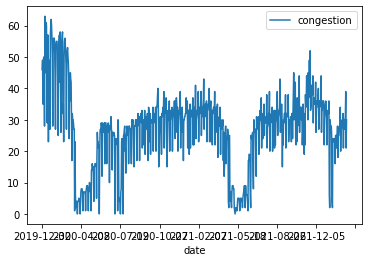

In [11]:
lines = df_tomtom_india_bengaluru.plot.line(x="date", y="congestion")

2022-02-22 13:55:46.009 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-02-22 13:55:46.046 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-02-22 13:55:46.650 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-02-22 13:55:46.687 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='date', ylabel='congestion'>

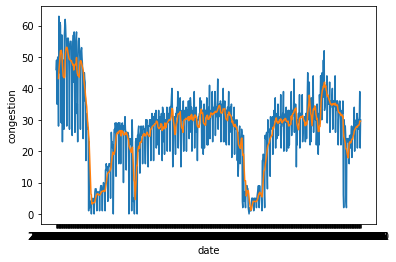

In [12]:
sns.lineplot(x="date", y="congestion", data=df_tomtom_india_bengaluru)
sns.lineplot(x="date", y="congestion_ma", data=df_tomtom_india_bengaluru)

2022-02-22 13:55:51.414 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-02-22 13:55:51.448 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-02-22 13:55:51.507 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-02-22 13:55:51.540 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


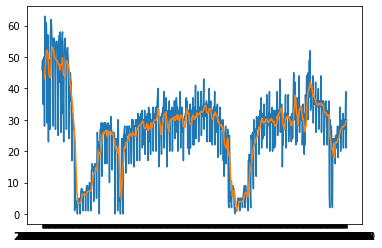

In [13]:
# plot
fig, ax = plt.subplots()

ax.plot(df_tomtom_india_bengaluru['date'], df_tomtom_india_bengaluru['congestion'])
ax.plot(df_tomtom_india_bengaluru['date'], df_tomtom_india_bengaluru['congestion_ma'])

plt.show()

In [14]:
st.pyplot(fig=lines)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [ ]:
def main():
    #Some title and descriptive text
    st.title("India Traffic Activity")

    #Getting the data and displaying the dataframe in the dashboard
    data = getData()
    
    #Multiple selection for the provinces
    provinces_options = list(data.Province.unique())
    st.sidebar.header("Costa Rica Earthquakes")
    st.sidebar.caption("This dashboard contains information for every recent earhtquake registered in Costa Rica.The data is collected from the OVSICORI website: http://www.ovsicori.una.ac.cr/index.php/sismologia/sistemas-de-consulta")
    province = st.sidebar.multiselect("Please select a province:",options=provinces_options, default=provinces_options)
    data_selected_province = data[data.Province.isin(province)]
    st.sidebar.caption("This dashboard was done by Jorge Cerdas https://www.linkedin.com/in/ing-jorgecerdas/")

    #Print the dataframe based on the user selection, 
    #By default all the locations are deisplayed
    st.dataframe(data_selected_province, width=4000, height=510)

    #Printing the density map
    st.title("Earthquakes density map")
    hMap = printDensityMap(data_selected_province)
    st.plotly_chart(hMap,use_container_width=True)
    
       
    #Printing magnitude line chart
    st.title("Magnitude line chart")
    magChart = printMgLineChart(data_selected_province)
    st.line_chart(magChart)

    st.title("Earthquakes bubble chart")
    scatter_fig = printBubbleScatter(data_selected_province)
    st.plotly_chart(scatter_fig, use_container_width=True)

In [99]:
pip install plost

  Created wheel for plost: filename=Plost-0.2.5-py3-none-any.whl size=12230 sha256=3126fa3ed7b90d67ef58dfe3f63d278b7927791bb4b46c7a8f3e1d40c090532f
  Stored in directory: /home/jovyan/.cache/pip/wheels/c9/fa/ca/9b7766475c8cf983a8c4e1dfc855fc439f5550e39154ed4cc8
Successfully built plost
Note: you may need to restart the kernel to use updated packages.


In [16]:
import plost

In [17]:
plost.line_chart(
  df_tomtom_india_bengaluru,
  x='date',
  y=('congestion', 'congestion_ma'),  # 👈 This is magic!
)

2022-02-22 13:56:41.002 
  command:

    streamlit run /srv/conda/envs/notebook/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [9]:
def averaging():
    df_tomtom_india_average = df_tomtom_india.groupby("date").mean()
    return df_tomtom_india_average

In [10]:
dataer = averaging()
dataer

,congestion,diffRatio
date,,
2019-12-30,42.75,-0.068876
2019-12-31,45.25,-0.039795
2020-01-01,33.00,-0.327273
2020-01-02,44.50,-0.067708
2020-01-03,47.25,-0.056892
...,...,...
2022-02-17,33.25,-0.295141
2022-02-18,35.50,-0.283318
2022-02-19,36.00,-0.128613
